# Bioassays of ELF EtOAc crude extracts on B. subtilis and E. coli
This Notebook will plot bioassay data for several fungal crude extracts against *Escherichia coli* 10B and *Bacillus subtilis* E168.

Stats and annotated *p*-values generated following this tutorial - https://github.com/trevismd/statannotations-tutorials/blob/main/Tutorial_1/Statannotations-Tutorial-1.ipynb

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
from utils import *
import numpy as np
from scipy.stats import ttest_rel

In [2]:
dataset = pd.read_csv('bioassay_transposed_results.csv')
dataset.head()

,Sample,Organism,OD600
0,22,B. subtilis,0.387
1,22,B. subtilis,0.253
2,22,B. subtilis,0.254
3,23,B. subtilis,0.375
4,23,B. subtilis,0.454


### Normalize treatment data by how much input compound was put into the treatment
Should just be able to divide the OD600 by the amount of compound input

In [3]:
extract_weights = {"Sample": ["22", "23", "27", "31", "32", "42", "50", "68", "76", "89", "103", "115", "116", "129", "135", "136", "negative", "positive", "contamination"],
                   "weight (mg)": [0.4, 0.8, 0.3, 1.8, 1.7, 0.9, 2.2, 4.6, 0.2, 5.3, 3.1, 26.3, 1.5, 0.7, 3, 1.2, 1, 1 ,1]}
weights = pd.DataFrame.from_dict(extract_weights)
weights['weight (µg)'] = (weights['weight (mg)'] / 10) * 1000
weights

,Sample,weight (mg),weight (µg)
0,22,0.4,40.0
1,23,0.8,80.0
2,27,0.3,30.0
3,31,1.8,180.0
4,32,1.7,170.0
5,42,0.9,90.0
6,50,2.2,220.0
7,68,4.6,460.0
8,76,0.2,20.0
9,89,5.3,530.0


In [4]:
# merge the 2 dataframes
dataset = dataset.merge(weights, on='Sample')
# divide the OD600 by the µg amount of sample, then multiply by 100
dataset["adjusted_OD600"] = (dataset["OD600"]/dataset["weight (µg)"]) * 100
dataset

,Sample,Organism,OD600,weight (mg),weight (µg),adjusted_OD600
0,22,B. subtilis,0.387,0.4,40.0,0.9675
1,22,B. subtilis,0.253,0.4,40.0,0.6325
2,22,B. subtilis,0.254,0.4,40.0,0.6350
3,22,E. coli,0.229,0.4,40.0,0.5725
4,22,E. coli,1.092,0.4,40.0,2.7300
...,...,...,...,...,...,...
109,contamination,B. subtilis,0.040,1.0,100.0,0.0400
110,contamination,B. subtilis,0.042,1.0,100.0,0.0420
111,contamination,E. coli,0.041,1.0,100.0,0.0410
112,contamination,E. coli,0.045,1.0,100.0,0.0450


In [5]:
# make pairs for t-test comparisons
pairs = [('22', 'negative'), ('23', 'negative'), ('27', 'negative'), ('31', 'negative'), \
         ('32', 'negative'), ('42', 'negative'), ('50', 'negative'), ('68', 'negative'), \
         ('76', 'negative'), ('89', 'negative'), ('103', 'negative'), ('115', 'negative'), \
         ('116', 'negative'), ('129', 'negative'), ('135', 'negative'), ('136', 'negative')]

def change_width(ax, new_value) :
    """
    Change the width of bars in barplot.
    """
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [6]:
bsub = dataset[dataset['Organism'].str.contains('B. subtilis')].reset_index(drop=True)
ecol = dataset[dataset['Organism'].str.contains('E. coli')].reset_index(drop=True)
bsub.head()
ecol.head()

,Sample,Organism,OD600,weight (mg),weight (µg),adjusted_OD600
0,22,E. coli,0.229,0.4,40.0,0.57250
1,22,E. coli,1.092,0.4,40.0,2.73000
2,22,E. coli,0.883,0.4,40.0,2.20750
3,23,E. coli,0.482,0.8,80.0,0.60250
4,23,E. coli,0.429,0.8,80.0,0.53625


In [7]:
# prepare lists of each triplicate OD600 results
b22 = dataset.loc[(dataset.Sample == "22") & (dataset.Organism == "B. subtilis"), "OD600"].values
b23 = dataset.loc[(dataset.Sample == "23") & (dataset.Organism == "B. subtilis"), "OD600"].values
b27 = dataset.loc[(dataset.Sample == "27") & (dataset.Organism == "B. subtilis"), "OD600"].values
b31 = dataset.loc[(dataset.Sample == "31") & (dataset.Organism == "B. subtilis"), "OD600"].values
b32 = dataset.loc[(dataset.Sample == "32") & (dataset.Organism == "B. subtilis"), "OD600"].values
b42 = dataset.loc[(dataset.Sample == "42") & (dataset.Organism == "B. subtilis"), "OD600"].values
b50 = dataset.loc[(dataset.Sample == "50") & (dataset.Organism == "B. subtilis"), "OD600"].values
b68 = dataset.loc[(dataset.Sample == "68") & (dataset.Organism == "B. subtilis"), "OD600"].values
b76 = dataset.loc[(dataset.Sample == "76") & (dataset.Organism == "B. subtilis"), "OD600"].values
b89 = dataset.loc[(dataset.Sample == "89") & (dataset.Organism == "B. subtilis"), "OD600"].values
b103 = dataset.loc[(dataset.Sample == "103") & (dataset.Organism == "B. subtilis"), "OD600"].values
b115 = dataset.loc[(dataset.Sample == "115") & (dataset.Organism == "B. subtilis"), "OD600"].values
b116 = dataset.loc[(dataset.Sample == "116") & (dataset.Organism == "B. subtilis"), "OD600"].values
b129 = dataset.loc[(dataset.Sample == "129") & (dataset.Organism == "B. subtilis"), "OD600"].values
b135 = dataset.loc[(dataset.Sample == "135") & (dataset.Organism == "B. subtilis"), "OD600"].values
b136 = dataset.loc[(dataset.Sample == "136") & (dataset.Organism == "B. subtilis"), "OD600"].values
e22 = dataset.loc[(dataset.Sample == "22") & (dataset.Organism == "E. coli"), "OD600"].values
e23 = dataset.loc[(dataset.Sample == "23") & (dataset.Organism == "E. coli"), "OD600"].values
e27 = dataset.loc[(dataset.Sample == "27") & (dataset.Organism == "E. coli"), "OD600"].values
e31 = dataset.loc[(dataset.Sample == "31") & (dataset.Organism == "E. coli"), "OD600"].values
e32 = dataset.loc[(dataset.Sample == "32") & (dataset.Organism == "E. coli"), "OD600"].values
e42 = dataset.loc[(dataset.Sample == "42") & (dataset.Organism == "E. coli"), "OD600"].values
e50 = dataset.loc[(dataset.Sample == "50") & (dataset.Organism == "E. coli"), "OD600"].values
e68 = dataset.loc[(dataset.Sample == "68") & (dataset.Organism == "E. coli"), "OD600"].values
e76 = dataset.loc[(dataset.Sample == "76") & (dataset.Organism == "E. coli"), "OD600"].values
e89 = dataset.loc[(dataset.Sample == "89") & (dataset.Organism == "E. coli"), "OD600"].values
e103 = dataset.loc[(dataset.Sample == "103") & (dataset.Organism == "E. coli"), "OD600"].values
e115 = dataset.loc[(dataset.Sample == "115") & (dataset.Organism == "E. coli"), "OD600"].values
e116 = dataset.loc[(dataset.Sample == "116") & (dataset.Organism == "E. coli"), "OD600"].values
e129 = dataset.loc[(dataset.Sample == "129") & (dataset.Organism == "E. coli"), "OD600"].values
e135 = dataset.loc[(dataset.Sample == "135") & (dataset.Organism == "E. coli"), "OD600"].values
e136 = dataset.loc[(dataset.Sample == "136") & (dataset.Organism == "E. coli"), "OD600"].values

bneg = dataset.loc[(dataset.Sample == "negative") & (dataset.Organism == "B. subtilis"), "OD600"].values
eneg = dataset.loc[(dataset.Sample == "negative") & (dataset.Organism == "E. coli"), "OD600"].values

print(b22)
print(e22)
print(bneg)
print(eneg)

[0.387 0.253 0.254]
[0.229 1.092 0.883]
[0.468 0.61  0.696]
[0.45  0.42  0.427]


In [8]:
# performs T-test for related samples - 
# the null hypothesis is that two related or repeated samples have identical average (expected) values.
# using alternative='less', meaning that the alternative hypothesis is that the first arrays avg is less than the second array
bsub_pvalues = [ttest_rel(b22, bneg, alternative="less").pvalue,
           ttest_rel(b23, bneg, alternative="less").pvalue,
           ttest_rel(b27, bneg, alternative="less").pvalue,
           ttest_rel(b31, bneg, alternative="less").pvalue,
           ttest_rel(b32, bneg, alternative="less").pvalue,
           ttest_rel(b42, bneg, alternative="less").pvalue,
           ttest_rel(b50, bneg, alternative="less").pvalue,
           ttest_rel(b68, bneg, alternative="less").pvalue,
           ttest_rel(b76, bneg, alternative="less").pvalue,
           ttest_rel(b89, bneg, alternative="less").pvalue,
           ttest_rel(b103, bneg, alternative="less").pvalue,
           ttest_rel(b115, bneg, alternative="less").pvalue,
           ttest_rel(b116, bneg, alternative="less").pvalue,
           ttest_rel(b129, bneg, alternative="less").pvalue,
           ttest_rel(b135, bneg, alternative="less").pvalue,
           ttest_rel(b136, bneg, alternative="less").pvalue]
ecol_pvalues = [ttest_rel(e22, eneg, alternative="less").pvalue,
           ttest_rel(e23, eneg, alternative="less").pvalue,
           ttest_rel(e27, eneg, alternative="less").pvalue,
           ttest_rel(e31, eneg, alternative="less").pvalue,
           ttest_rel(e32, eneg, alternative="less").pvalue,
           ttest_rel(e42, eneg, alternative="less").pvalue,
           ttest_rel(e50, eneg, alternative="less").pvalue,
           ttest_rel(e68, eneg, alternative="less").pvalue,
           ttest_rel(e76, eneg, alternative="less").pvalue,
           ttest_rel(e89, eneg, alternative="less").pvalue,
           ttest_rel(e103, eneg, alternative="less").pvalue,
           ttest_rel(e115, eneg, alternative="less").pvalue,
           ttest_rel(e116, eneg, alternative="less").pvalue,
           ttest_rel(e129, bneg, alternative="less").pvalue,
           ttest_rel(e135, eneg, alternative="less").pvalue,
           ttest_rel(e136, eneg, alternative="less").pvalue]
print(len(bsub_pvalues), len(ecol_pvalues))
print(bsub_pvalues)
print(ecol_pvalues)

16 16
[0.05736332781674873, 0.04975438634934807, 0.03209994638899994, 0.056780707093393834, 0.740212228395677, 0.007725032009004328, 0.034489592152069176, 0.028158400035067945, 0.008172499598332092, 0.7790204048356727, 0.03341934825873972, 0.03482639443622877, 0.9454745601654889, 0.008779232806392506, 0.017557853170663374, 0.009791901675983457]
[0.8110923580570775, 0.535882497795843, 0.2166156948905104, 0.965870101846988, 0.010379376438932213, 0.9475923619582298, 0.0015142417272569985, 0.07750494941602804, 0.006536769991154199, 0.00033466533619077096, 0.056257036146305096, 0.037113226120571684, 0.9174872800373298, 0.0825127199626702, 0.00047225933600611957, 0.00040425087616238894]


### Plots of OD600 data

ValueError: Missing x value(s) `"('136', 'B. subtilis')", "('68', 'B. subtilis')", "('135', 'E. coli')", "('42', 'E. coli')", "('89', 'E. coli')", "('103', 'B. subtilis')", "('115', 'E. coli')", "('32', 'E. coli')", "('50', 'E. coli')", "('negative', 'E. coli')", "('135', 'B. subtilis')", "('68', 'E. coli')", "('42', 'B. subtilis')", "('89', 'B. subtilis')", "('136', 'E. coli')", "('115', 'B. subtilis')", "('32', 'B. subtilis')", "('103', 'E. coli')", "('50', 'B. subtilis')", "('negative', 'B. subtilis')"` in Sample (specified in `pairs`) in data

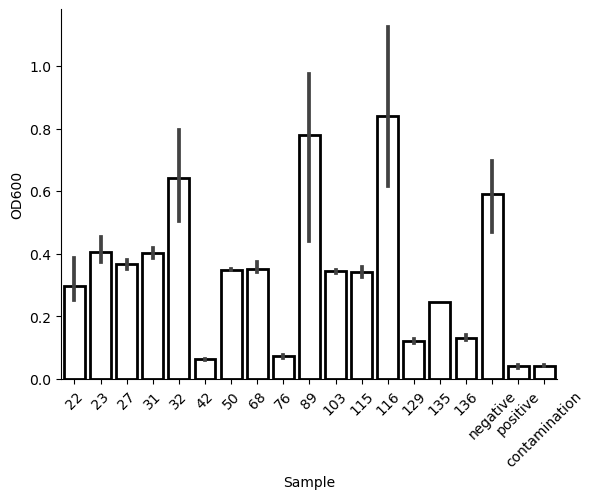

In [12]:
# Create new plot
# set params
plotting_parameters = {
    'data':    bsub,
    'x':       'Sample',
    'y':       'OD600',
}
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=bsub, x='Sample', y='OD600', color='white', linewidth=2, edgecolor="black")#, palette="deep")
sns.despine()
# rotate x labels
plt.xticks(rotation=45)

# change width of bars with 'change_width' func
change_width(ax, .8)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(bsub_formatted_pvalues)
annotator.configure(test='t-test_ind').apply_and_annotate()
plt.title("ELF extracts bioactivty against B. subtilis")
plt.savefig("bsub_OD600_values.svg", format="svg", bbox_inches='tight')
plt.show()

ValueError: Missing x value(s) `"('136', 'B. subtilis')", "('68', 'B. subtilis')", "('135', 'E. coli')", "('42', 'E. coli')", "('89', 'E. coli')", "('103', 'B. subtilis')", "('115', 'E. coli')", "('32', 'E. coli')", "('50', 'E. coli')", "('negative', 'E. coli')", "('135', 'B. subtilis')", "('68', 'E. coli')", "('42', 'B. subtilis')", "('89', 'B. subtilis')", "('136', 'E. coli')", "('115', 'B. subtilis')", "('32', 'B. subtilis')", "('103', 'E. coli')", "('50', 'B. subtilis')", "('negative', 'B. subtilis')"` in Sample (specified in `pairs`) in data

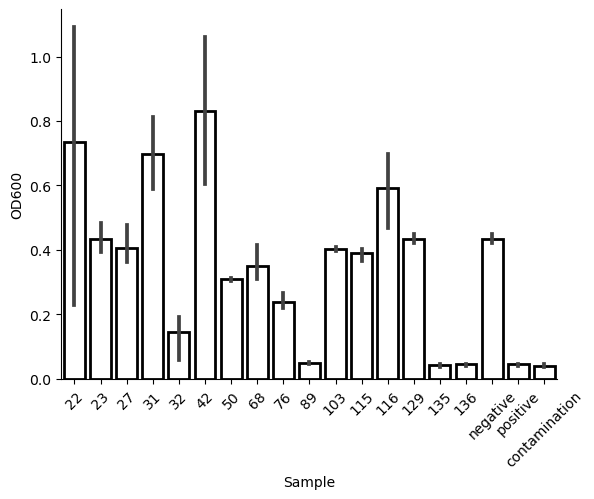

In [13]:
# Create new plot
# set params
plotting_parameters = {
    'data':    ecol,
    'x':       'Sample',
    'y':       'OD600',
}
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=ecol, x='Sample', y='OD600', color='white', linewidth=2, edgecolor="black")#, palette="deep")
sns.despine()
# rotate x labels
plt.xticks(rotation=45)

# change width of bars with 'change_width' func
change_width(ax, .8)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(ecol_formatted_pvalues)
annotator.configure(test='t-test_ind').apply_and_annotate()
plt.title("ELF extracts bioactivty against E. coli")
plt.savefig("ecoli_OD600_values.svg", format="svg", bbox_inches='tight')
plt.show()

### Plots of OD600 normalized to input extract weight

c:\Windows\Anaconda3-2021.11\envs\plotting\lib\site-packages\statannotations\stats\StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

136_B. subtilis vs. negative_B. subtilis: t-test independent samples, P_val:1.933e-03 t=-7.239e+00
136_E. coli vs. negative_E. coli: t-test independent samples, P_val:1.773e-06 t=-4.285e+01
135_B. subtilis vs. negative_B. subtilis: t-test independent samples, P_val:1.560e-03 t=-7.662e+00
135_E. coli vs. negative_E. coli: t-test independent samples, P_val:1.349e-06 t=-4.589e+01
115_B. subtilis vs. negative_B. subtilis: t-test independent samples, P_val:9.611e-04 t=-8.700e+00
115_E. coli vs. negative_E. coli: t-test independent samples, P_val:1.334e-06 t=-4.601e+01
103_B. subtilis vs. negative_B. subtilis: t-test independent samples, P_val:1.948e-03 t=-7.224e+00
103_E. coli vs. negative_E. coli: t-test independent samples, P_val:4.939e-06 t=-3.315e+01
89_B. subtilis vs. negative_B. subtilis: t-test independent

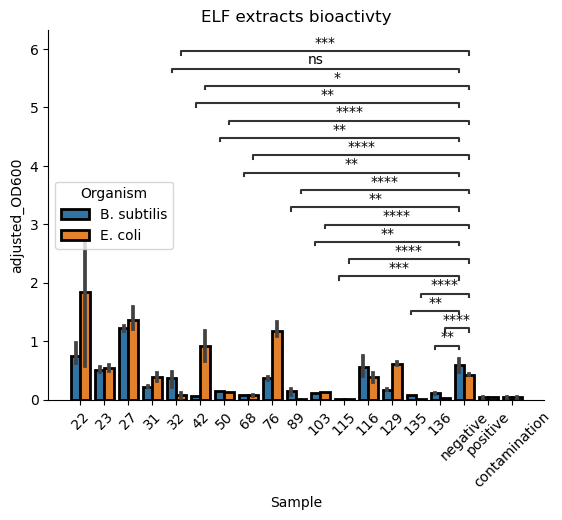

In [14]:
# Create new plot
# set params
plotting_parameters = {
    'data':    dataset,
    'x':       'Sample',
    'y':       'adjusted_OD600',
    'dodge':   True,
    #'color': 'white',
    'palette': 'tab10',
    'linewidth': 2,
    'edgecolor': 'black',
    #'order': sorted(list(set(dataset["Sample"].tolist()))),
    'hue': 'Organism', 
    "hue_order": ["B. subtilis", "E. coli"],
}
fig, ax = plt.subplots()
sns.barplot(ax=ax, **plotting_parameters)#, palette="deep")
sns.despine()
# rotate x labels
plt.xticks(rotation=45)

# change width of bars with 'change_width' func
#change_width(ax, .8)

pairs = [[("32", "B. subtilis"),("negative", "B. subtilis")],
         [("42", "B. subtilis"),("negative", "B. subtilis")],
         [("50", "B. subtilis"),("negative", "B. subtilis")],
         [("68", "B. subtilis"),("negative", "B. subtilis")],
         [("89", "B. subtilis"),("negative", "B. subtilis")],
         [("103", "B. subtilis"),("negative", "B. subtilis")],
         [("115", "B. subtilis"),("negative", "B. subtilis")],
         [("135", "B. subtilis"),("negative", "B. subtilis")],
         [("136", "B. subtilis"),("negative", "B. subtilis")],
         [("32", "E. coli"),("negative", "E. coli")],
         [("42", "E. coli"),("negative", "E. coli")],
         [("50", "E. coli"),("negative", "E. coli")],
         [("68", "E. coli"),("negative", "E. coli")],
         [("89", "E. coli"),("negative", "E. coli")],
         [("103", "E. coli"),("negative", "E. coli")],
         [("115", "E. coli"),("negative", "E. coli")],
         [("135", "E. coli"),("negative", "E. coli")],
         [("136", "E. coli"),("negative", "E. coli")]]

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(ecol_formatted_pvalues)
annotator.configure(test='t-test_ind').apply_and_annotate()
plt.title("ELF extracts bioactivty")
plt.savefig("normalized_OD600_values.svg", format="svg", bbox_inches='tight')
plt.show()